# Wine Quality Research

## Project Description
The goal of the project is to analyze the data, find driving features of wine quality, predict quality of wine, and recommend actions to produce good quality wine.

## Goals:

   - Discover drivers of wine quality
   - Use drivers to develop a model to predict wine quality
   - Offer recommendation to  produce good quality wine

In [1]:
# Essential Imports
import pandas as pd  
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
from scipy import stats

# Import .py files
import prepare as pr
import explore as ex
import model as mo

# Sklearn imports
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import warnings
warnings.filterwarnings('ignore')

seed = 42

%matplotlib inline

## Acquire

- Acquired data from Data.World Wine Quality Dataset using acquire.py file.
- It contained 6497 rows and 13columns.
- Each row represents a wine.
- Each column represents a feaures of a wine.

In [2]:
# acquire data
wine= pr.wine_data()

# peak into data
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Prepare

#### Prepare Actions:
- Rename columns names
- Checked for Nulls, no Null
- Encoded categorical varibales
- split data into train, validate and test (approx. 56/24/20)

In [3]:
# create train, validate, test data
train,validate,test = pr.train_val_test(wine,'quality')

In [4]:
# create scaled train, sacled validate, scaled test data
trains,validates,tests = pr.split_data(wine.drop(columns='quality_bin'),'quality')

## Explore

### What is the relationship between alcohol and quality?

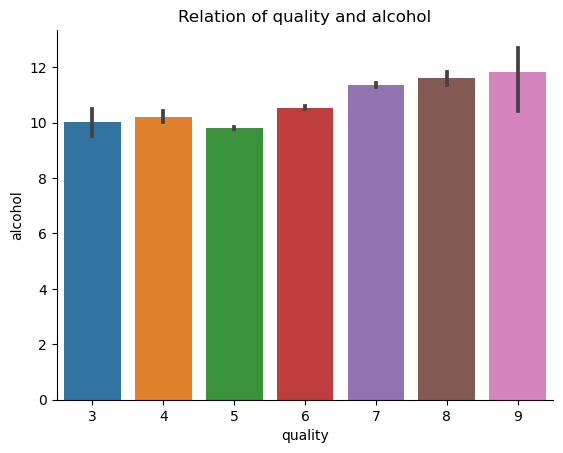

In [5]:
# get graph 
ex.viz_barplot(train, 'quality', 'alcohol')

In [6]:
# get result from pearsonr test
ex.pearson_test(train,'alcohol','quality')

p is 0.0000000000, 0.4419210227831018
The pearson r test shows that there is a signficant relationship.


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that quality of wine increaes when alcohol percentage is more than 11.
    
Pearsonr test shows that alchol and quality has positive correlation of .44 and has a significant relationship. 
</div>


### Does density play role in determining quality of wine?

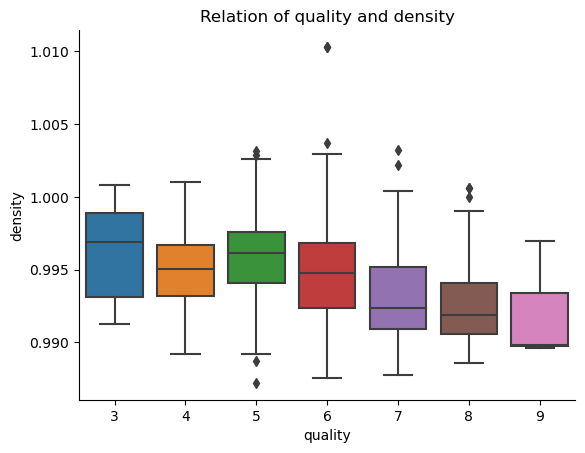

In [7]:
# get graph
ex.viz_boxplot(train, 'quality','density')

In [8]:
# get result from pearsonr test
ex.pearson_test(train,'density','quality')

p is 0.0000000000, -0.31002127979856076
The pearson r test shows that there is a signficant relationship.


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that density below .995 is optimal to make good wine. Density has negative correaltion with quality of wine. 
    
Pearsonr test shows that alchol and quality has negative correlation of about 0.31 and has a significant relationship. 

</div>

###  Is the relationship between volatile_acidity and quality significant?

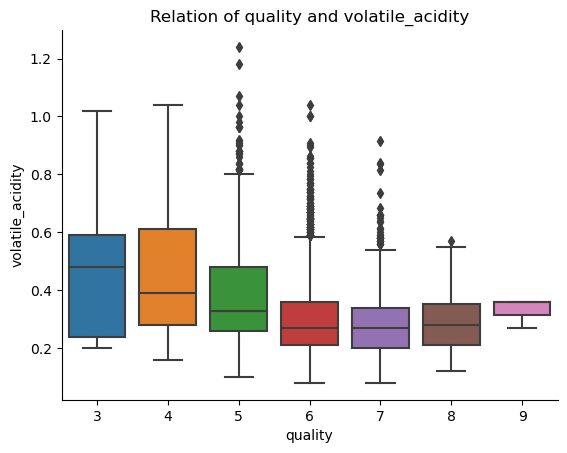

In [9]:
ex.viz_boxplot(train, 'quality', 'volatile_acidity')

<div class="alert alert-block alert-info">
<b>$Ha$:</b> There is no significant difference in the mean  
    
    
<b>$Ho$:</b> There is a significant difference in the mean  
</div>

In [10]:
# get result from pearsonr test
ex.pearson_test(train,'volatile_acidity','quality')

p is 0.0000000000, -0.2587959872859457
The pearson r test shows that there is a signficant relationship.


In [11]:
mo.vol_t_test(train)

p = 2.0796791836066002e-26, t = -10.746362824466681
Reject $H_{0}$?  True


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that volatile acidity has negative correlation with quality of alcohol. Wine with volatile acidity above .4 is poor in quality.  
</div>

### What role does chlorides and density play on quality of wine?

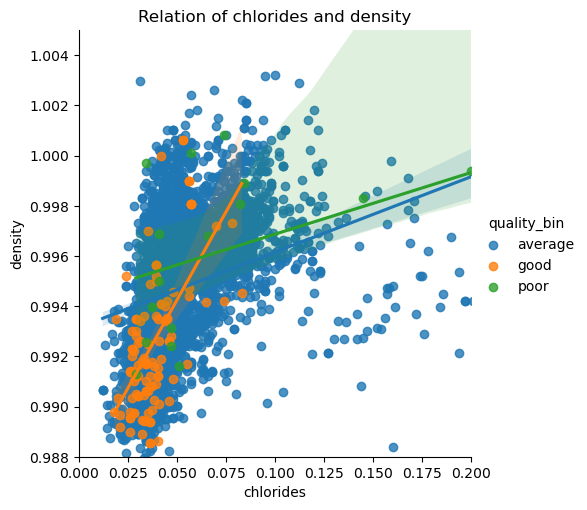

In [12]:
ex.viz_lmplot(train, 'chlorides', 'density')

<div class="alert alert-block alert-warning">
<b>TakeAways:</b> 
    
From graph, we can see that low density and low chlorides produce good wine. 
    
 
</div>

####  Split Data for scaling

In [13]:
# split the feature from the target
x_train, y_train, x_validate, y_validate, x_test, y_test = pr.x_and_y(trains,validate,tests,'quality')

In [14]:
# split the feature from the target on scaled data
x_trains, y_train, x_validates, y_validate, x_tests, y_test = pr.x_and_y(trains,validates,tests,'quality')

## `alochol` and `density`

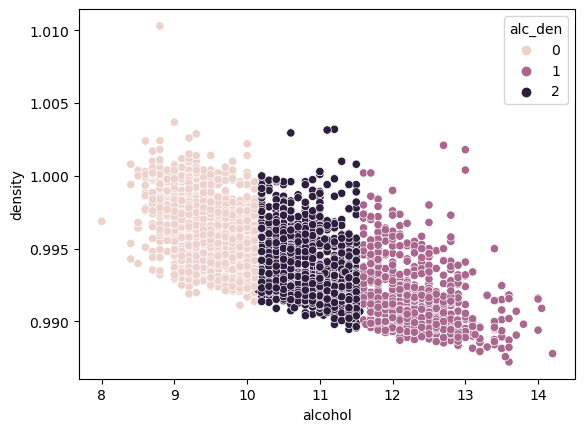

In [15]:
x_trains,x_validates,x_tests = mo.alc_den_clusters(x_trains,x_validates,x_tests)

## `alochol` and `volatile_acidty`

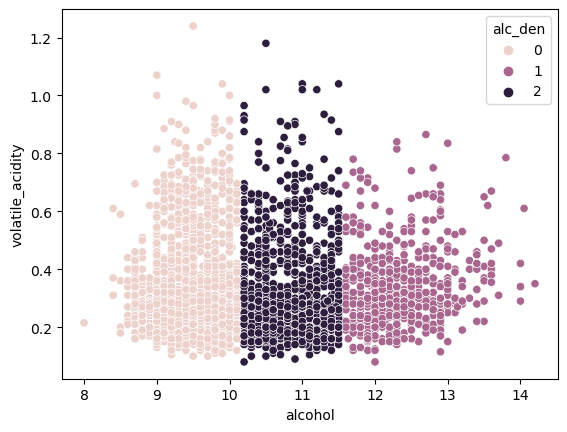

In [16]:
x_trains,x_validates,x_tests = mo.alc_vol_clusters(x_trains,x_validates,x_tests)

## `density` and `residual_sugar`

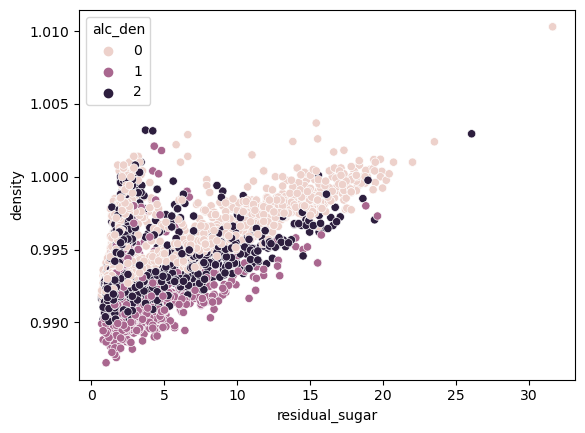

In [17]:
x_trains,x_validates,x_tests = mo.den_res_clusters(x_trains,x_validates,x_tests)

<div class="alert alert-block alert-success">
<b>Explore summary:</b> 
    
- Alcohol, chlorides, volatile acidity and density has high correlation with quality
    
- Alochol has positive correlation with quality, but chlorides, volatile acidity and density have negative correlation with quality
    
- low density and low chlorides produce good wine
    
</div>

###  Baseline Accuracy

<div class="alert alert-block alert-warning">
<b>Baseline Accuracy:</b> 44%

## Modeling
-  I will use train data and validate data on different models to get the model that performs the best.Then, I will use the test data on the best model to get predicitons.
- I will use my baseline accuracy as my evaluation metric.
- I will use following four modelsto get the best model:
    - Model 1: Decision Tree
    - Model 2: Random forest Tree 
    - Model 3: KNN


In [18]:
df = mo.get_models_accuracy(x_trains, y_train, x_validates, y_validate, trains, validates)
df

,train_accuracy,validate_accuracy,difference
Decision_Tree(max_depth=7),0.643662,0.545513,0.098150
Random_Forest(min_samples_lead=17),0.659610,0.558974,0.100635
KNN (Neighours=9),0.571625,0.479487,0.092138
Logistic_Regression(C=1),0.541105,0.537179,0.003926


<Figure size 300x600 with 0 Axes>

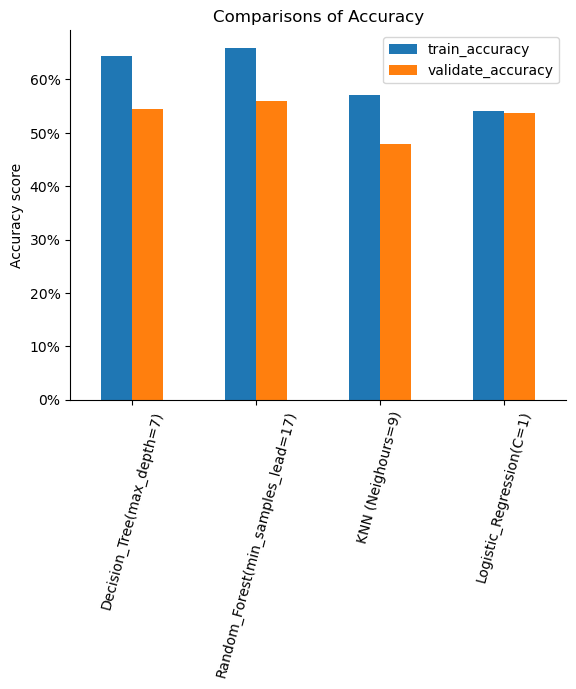

In [19]:
mo.viz_models_accuracy(df)

### Model Evaluation

<div class="alert alert-block alert-warning">
<b>Baseline Accuracy:</b> 44%

<div class="alert alert-block alert-warning">
<b>Random Forest Accuracy score on test data:</b> 58%

<div class="alert alert-block alert-success">
<b>Modelling summary:</b> 
    
- All models perfomed better than baseline on train and validat data.
    
- Random forest tree model has the highest accuracy score of about 56% on validate data. 
    
- Random forest tree model has the accuracy score of about 58% on test data and beat the baseline accuracy by about 14%.
    
</div>

## Conclusion

<div class="alert alert-block alert-success">
<b>Conclusion:</b> 
    
* conclude
</div>

<div class="alert alert-block alert-success">
<b>Recommendation:</b> 
    
* We recommend to
</div>

<div class="alert alert-block alert-success">
<b>Next Steps:</b> 
    
* We recommend to
</div>